# **DRZEWA DECYZYJNE**

### BREAST CANCER DATASET

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer.target_names)
print(data_breast_cancer.feature_names)
print(data_breast_cancer.DESCR)
# 'malignant' - złośliwy
# 'benign'    - łagodny


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    -

# **Klasyfikacja drzewami decyzyjnymi** zbioru danych data_breast_cancer dla cech **mean texture** i **mean symmetry**

In [ ]:
X_bc = data_breast_cancer.data[['mean texture','mean symmetry']]
y_bc = data_breast_cancer.target

print(X_bc.head())
print(y_bc.head())

   mean texture  mean symmetry
0         10.38         0.2419
1         17.77         0.1812
2         21.25         0.2069
3         20.38         0.2597
4         14.34         0.1809
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Sprawdzenie wartosci f1 dla roznych glebokosci - bez GridSearchCv

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_6 = DecisionTreeClassifier(max_depth=6, random_state=42)

tree_clf_1.fit(X_bc_train, y_bc_train)
tree_clf_2.fit(X_bc_train, y_bc_train)
tree_clf_3.fit(X_bc_train, y_bc_train)
tree_clf_4.fit(X_bc_train, y_bc_train)
tree_clf_5.fit(X_bc_train, y_bc_train)
tree_clf_6.fit(X_bc_train, y_bc_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
from sklearn.metrics import f1_score

f1_train_1 = f1_score(y_bc_train, tree_clf_1.predict(X_bc_train))
f1_test_1 = f1_score(y_bc_test, tree_clf_1.predict(X_bc_test))

f1_train_2 = f1_score(y_bc_train, tree_clf_2.predict(X_bc_train))
f1_test_2 = f1_score(y_bc_test, tree_clf_2.predict(X_bc_test))

f1_train_3 = f1_score(y_bc_train, tree_clf_3.predict(X_bc_train))
f1_test_3 = f1_score(y_bc_test, tree_clf_3.predict(X_bc_test))

f1_train_4 = f1_score(y_bc_train, tree_clf_4.predict(X_bc_train))
f1_test_4 = f1_score(y_bc_test, tree_clf_4.predict(X_bc_test))

f1_train_5 = f1_score(y_bc_train, tree_clf_5.predict(X_bc_train))
f1_test_5 = f1_score(y_bc_test, tree_clf_5.predict(X_bc_test))

f1_train_6 = f1_score(y_bc_train, tree_clf_6.predict(X_bc_train))
f1_test_6 = f1_score(y_bc_test, tree_clf_6.predict(X_bc_test))

In [ ]:
print('f1 train max_depth=1 : ', f1_train_1)
print('f1 test max_depth=1 : ', f1_test_1)

print('\nf1 train max_depth=2 : ',f1_train_2)
print('f1 test max_depth=2 : ', f1_test_2)

print('\nf1 train max_depth=3 : ',f1_train_3)
print('f1 test max_depth=3 : ', f1_test_3)

print('\nf1 train max_depth=4 : ',f1_train_4)
print('f1 test max_depth=4 : ', f1_test_4)

print('\nf1 train max_depth=5 : ',f1_train_5)
print('f1 test max_depth=5 : ', f1_test_5)

print('\nf1 train max_depth=6 : ',f1_train_6)
print('f1 test max_depth=6 : ', f1_test_6)

f1 train max_depth=1 :  0.75390625
f1 test max_depth=1 :  0.6949152542372882

f1 train max_depth=2 :  0.8211243611584327
f1 test max_depth=2 :  0.7887323943661971

f1 train max_depth=3 :  0.8211243611584327
f1 test max_depth=3 :  0.7887323943661971

f1 train max_depth=4 :  0.8464163822525598
f1 test max_depth=4 :  0.7647058823529411

f1 train max_depth=5 :  0.8710217755443886
f1 test max_depth=5 :  0.7397260273972602

f1 train max_depth=6 :  0.896551724137931
f1 test max_depth=6 :  0.7310344827586207


# Widac, ze f1 na zbiorze testowym osiagnelo maksimum dla depth=3, f1 dla zbioru uczacego rosnie wraz ze wzrostem glebokosci

# Sprawdzenie najlepszych f1 - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(tree_clf,
                      param_grid = param_grid,
                      scoring='f1',
                      n_jobs=-1)


In [ ]:
search.fit(X_bc, y_bc)
print(f'Dla calego zbioru: najlepsze f1 = {search.best_score_}')
print(search.best_params_)

Dla calego zbioru: najlepsze f1 = 0.8051937497165784
{'max_depth': 2}


In [ ]:
# !!!!!!!!! dla zbioru uczacego !!!!!!!!!!!!!!!

search.fit(X_bc_train, y_bc_train)
print(f'Dla zbioru uczacego: najlepsze f1 = {search.best_score_}')
print(search.best_params_)
print(search.best_estimator_)

Dla zbioru uczacego: najlepsze f1 = 0.8038301730948788
{'max_depth': 2}
DecisionTreeClassifier(max_depth=2, random_state=42)


### GridSearchCV dla zbioru treningowego wykazał, że najlepsze max_depth=2 przy f1 = 0.8038301730948788

# Rysunek drzewa decyzyjnego

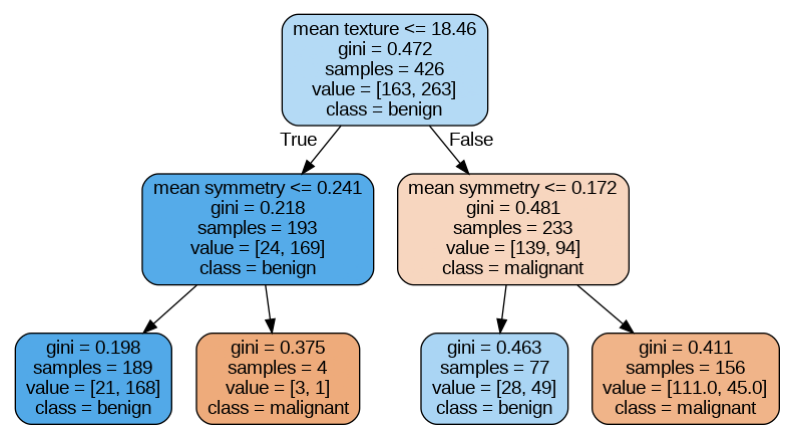

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

f = "breast_cancer_tree.dot"

export_graphviz(
    tree_clf_2, # dla max_depth=2
    out_file=f,
    feature_names=['mean texture','mean symmetry'],
    class_names=['malignant', 'benign'],
    rounded=True,
    filled=True
)

graph = graphviz.Source.from_file(f)
graph.render("bc", format="png")

import matplotlib.image as mpimg

img = mpimg.imread("bc.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import pickle
from sklearn.metrics import accuracy_score

# accuracy dla modelu z max_depth=2
acc_train_2 = accuracy_score(y_bc_train, tree_clf_2.predict(X_bc_train))
acc_test_2 = accuracy_score(y_bc_test, tree_clf_2.predict(X_bc_test))

print(acc_train_2)
print(acc_test_2)

print(tree_clf_2.max_depth)

cls_list = [tree_clf_2.max_depth, f1_train_2, f1_test_2, acc_train_2, acc_test_2]
print(cls_list)

0.7692307692307693
0.7368421052631579
2
[2, 0.8211243611584327, 0.7887323943661971, 0.7692307692307693, 0.7368421052631579]


In [ ]:
with open('f1acc_tree.pkl', 'wb') as file:
  pickle.dump(cls_list, file)

# **REGRESJA DRZEWAMI DECYZYJNYMI**

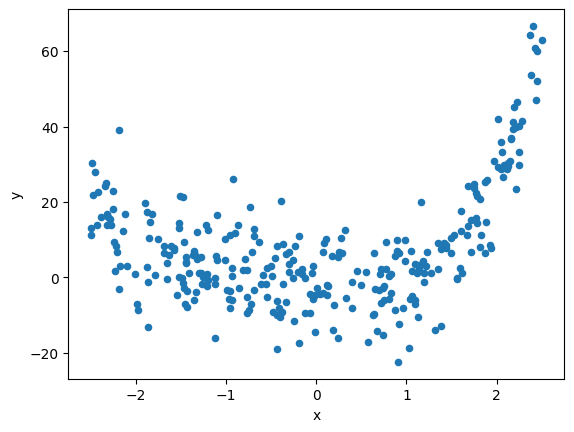

In [ ]:
# dane do regresji

size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({
    'x' : X,
    'y' : y
})
df.plot.scatter(x='x',y='y')

X = X.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_4 = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg_5 = DecisionTreeRegressor(max_depth=5, random_state=42)

tree_reg_1.fit(X_train, y_train)
tree_reg_2.fit(X_train, y_train)
tree_reg_3.fit(X_train, y_train)
tree_reg_4.fit(X_train, y_train)
tree_reg_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# sortowanie danych by mozna bylo zrobic plot a nie scatter
y_pred = tree_reg_1.predict(X_train)

sort_idx = np.argsort(X_train[:, 0])
X_train_sorted = X_train[sort_idx]
y_pred_sorted = y_pred[sort_idx]

### **Dla max_depth=1**

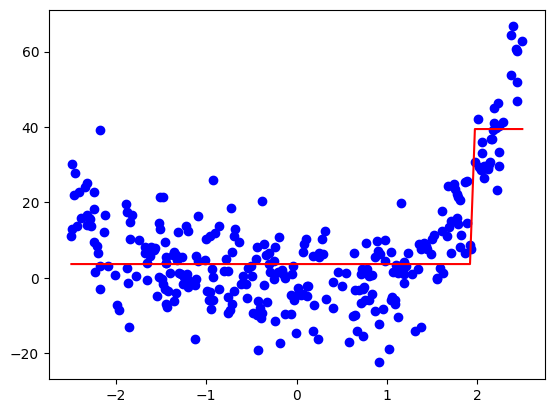

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_train_sorted, tree_reg_1.predict(X_train_sorted), color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse_1_train = mean_squared_error(y_train, tree_reg_1.predict(X_train))
mse_1_test = mean_squared_error(y_test, tree_reg_1.predict(X_test))
print(mse_1_train)
print(mse_1_test)
# 110.18256202421442
# 118.3227210311923

105.10267321398486
122.55878086593404


### **Dla max_depth=2**

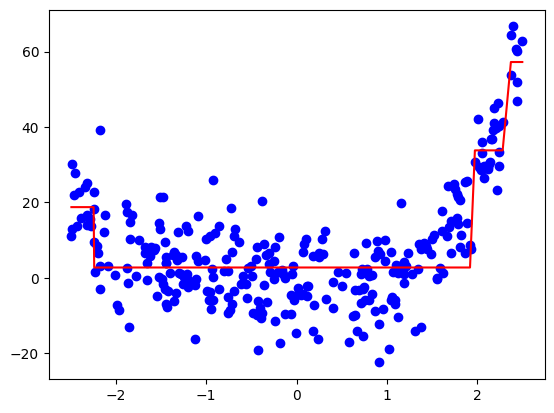

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_train_sorted, tree_reg_2.predict(X_train_sorted), color='red')
plt.show()

In [ ]:
mse_2_train = mean_squared_error(y_train, tree_reg_2.predict(X_train))
mse_2_test = mean_squared_error(y_test, tree_reg_2.predict(X_test))
print(mse_2_train)
print(mse_2_test)
# 88.94244873404277
# 84.77957216788114

80.86333329262328
90.32785911063866


### **Dla max_depth=3**

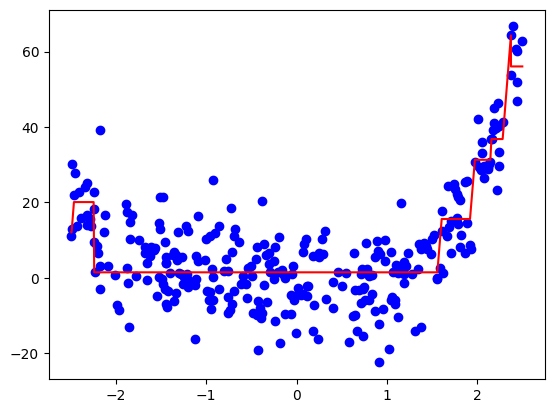

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_train_sorted, tree_reg_3.predict(X_train_sorted), color='red')
plt.show()

In [ ]:
mse_3_train = mean_squared_error(y_train, tree_reg_3.predict(X_train))
mse_3_test = mean_squared_error(y_test, tree_reg_3.predict(X_test))
print(mse_3_train)
print(mse_3_test)
# 69.97230210122528
# 47.4533040463316

65.84146571713602
82.33063143315115


### **Dla max_depth=4**

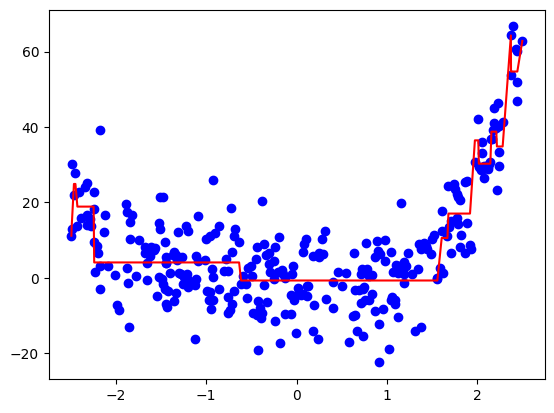

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_train_sorted, tree_reg_4.predict(X_train_sorted), color='red')
plt.show()

Widać po wykresie,że zaczyna występować overfitting

In [ ]:
mse_4_train = mean_squared_error(y_train, tree_reg_4.predict(X_train))
mse_4_test = mean_squared_error(y_test, tree_reg_4.predict(X_test))
print(mse_4_train)
print(mse_4_test)
# 64.0065364499273
# 46.120461149808605

60.10815652886758
72.93085003845295


### **Dla max_depth=4**

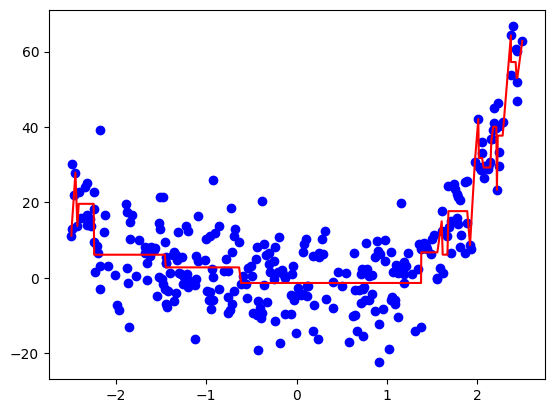

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X_train_sorted, tree_reg_5.predict(X_train_sorted), color='red')
plt.show()

In [ ]:
mse_5_train = mean_squared_error(y_train, tree_reg_5.predict(X_train))
mse_5_test = mean_squared_error(y_test, tree_reg_5.predict(X_test))
print(mse_5_train)
print(mse_5_test)
# 56.83077650332536
# 54.46622655391928

55.172799498685315
67.36165718607474


### GridSearchCV do wyznaczenia najlepszego max_depth

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(
    tree_reg,
    param_grid,
    scoring='neg_mean_squared_error', # w GridSearchCV ocena jest maksymalizowana wiec tu musi byc ujemna
    n_jobs=-1
)

search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print(f'Dla zbioru uczacego: najlepsze mse = {search.best_score_}')
print(search.best_params_)

Dla zbioru uczacego: najlepsze mse = -74.90984380374054
{'max_depth': 4}


### GridSearchCV wykazał, że najlepsze mse regresor osiaga dla max_depth=3

In [ ]:
# DLA max_depth=4 :
print('TreeRegressor MSE na zbioerze treningowym dla max_depth = 3 : ', mse_3_train)
print('TreeRegressor MSE na zbiorze testowym dla max_depth = 3     : ', mse_3_test)

# Porownanie z innymi regresorami:
#             train_mse    test_mse
# knn_3_reg    46.157557   91.214159
# knn_5_reg    56.096961   79.229973
# poly_2_reg  101.296833   75.951908
# poly_3_reg   75.136151   70.683252
# poly_4_reg   69.279626   66.865415
# poly_5_reg   69.261419   66.846479
# tree_reg     59.693238   116.86917

# Widać więc, że Tree Regressor wykazuje najmniejsze(najkorzystniejsze) MSE dla treningowego,
# jednak dla testowego jest juz nacznie gorsze wiec trzeba uważać bo jest bardzo podatny na overfitting


TreeRegressor MSE na zbioerze treningowym dla max_depth = 3 :  65.84146571713602
TreeRegressor MSE na zbiorze testowym dla max_depth = 3     :  82.33063143315115


DecisionTreeRegressor(max_depth=4, random_state=42)


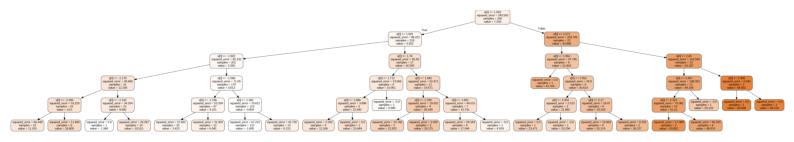

In [ ]:
# Rysunek drzewa decyzyjnego

best_reg = search.best_estimator_
print(search.best_estimator_)


fi = "regression.dot"

export_graphviz(
    best_reg, # dla max_depth=3
    out_file=fi,
    feature_names=['x'],
    rounded=True,
    filled=True
)

graph = graphviz.Source.from_file(fi)
graph.render("reg", format="png")

import matplotlib.image as mpimg

img = mpimg.imread("reg.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
mse_train = mean_squared_error(y_train, best_reg.predict(X_train))
mse_test = mean_squared_error(y_test, best_reg.predict(X_test))

print('MSE train : ', mse_train)
print('MSE test  : ' , mse_test)

reg_list = [best_reg.max_depth, mse_train, mse_test]

MSE train :  60.10815652886758
MSE test  :  72.93085003845295


In [ ]:
with open("mse_tree.pkl", 'wb') as file:
  pickle.dump(reg_list, file)